# 2.5.3 [Dimensionality Reduction in Linear Reduction](https://courses.thinkful.com/data-201v1/project/2.5.3)

In [13]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_score


%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

Partial least squares regression: iterative dimensionality reduction, first tries to find the vector within the n-dimensional space of X with the highest covariance with y. Then looks for a second vector, perpendicular to the first, that explains the highest covariance with y that remains afer accounting for the first vector. Continues for as many compoenents as we permit, up to n.

In [60]:
np.random.normal(size=n * p).reshape((n,p))

ValueError: cannot reshape array of size 10000 into shape (1000000,10)

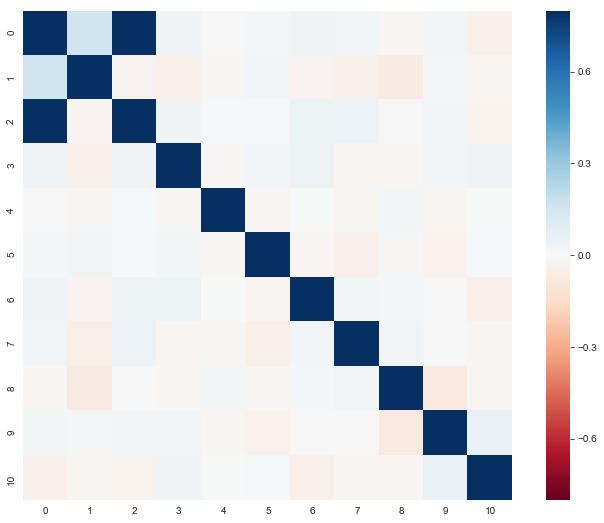

In [58]:
# Number of datapoints in outcome.
n = 1000

# number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n,p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 5 * X[:, 1] + np.random.normal(size=n * 1) + 15

# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaorn.
sns.heatmap(corrmat, vmax=.8, vmin=-.8, square=True, cmap='RdBu')
plt.show()

In [ ]:
# kfold Linear Regression
# Compare differing numbers of PLSR 

R-squared regression: 0.8253930202453338
R-squared PLSR 3 features: 0.8253929924789901
R-squared PLSR 5 features: 0.8253930202451348
R-squared PLSR 7 features: 0.8253930202453338


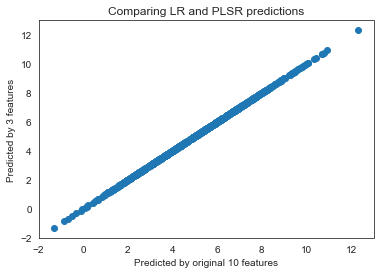

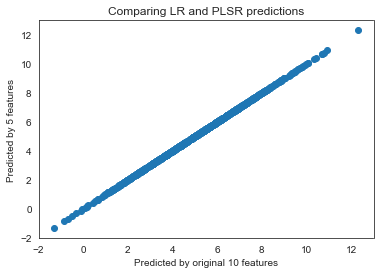

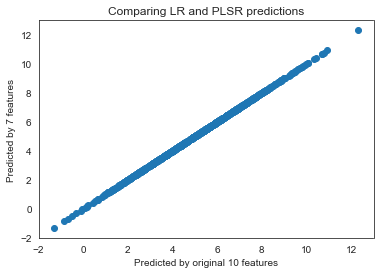

In [12]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X,y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X,y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce X to R(X) and regress on y.
pls3 = PLSRegression(n_components=3)
pls5 = PLSRegression(n_components=5)
pls7 = PLSRegression(n_components=7)

# Reduce X to R(X) and regress on y.
pls3.fit(X,y)
pls5.fit(X,y)
pls7.fit(X,y)

# Save predicted values.
Y_PLS_pred3 = pls3.predict(X)
print('R-squared PLSR 3 features:', pls3.score(X,y))
Y_PLS_pred5 = pls5.predict(X)
print('R-squared PLSR 5 features:', pls5.score(X,y))
Y_PLS_pred7 = pls7.predict(X)
print('R-squared PLSR 7 features:', pls7.score(X,y))
\

# Compare the predictions of the two models
plt.scatter(Y_pred, Y_PLS_pred3)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()


# Compare the predictions of the two models
plt.scatter(Y_pred, Y_PLS_pred5)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 5 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

# Compare the predictions of the two models
plt.scatter(Y_pred, Y_PLS_pred7)
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 7 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [14]:

regr = PLSRegression(n_components=n)
print('{}:PLSR Features'.format(n))
print(cross_val_score(regr, X, y, cv=10))

[0.80595437 0.79438368 0.8315547  0.85294698 0.79308033 0.8433115
 0.82399773 0.80097994 0.74274924 0.8670942 ]


R-squared PLSR 1 features: 0.820750677113506
1 PLSR Features cv_scores: [0.80126792 0.79007885 0.81647612 0.83627314 0.79748928 0.84776216
 0.81390952 0.8029136  0.72362767 0.86451383]
Average: 0.8094312088594877



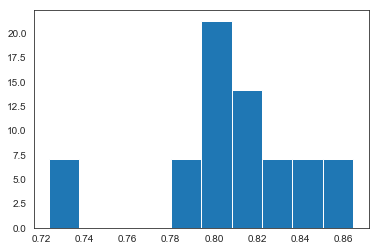

R-squared PLSR 2 features: 0.8253870795054709
2 PLSR Features cv_scores: [0.80609399 0.79424017 0.8313833  0.85291749 0.79314866 0.84328116
 0.82434019 0.80063507 0.74241576 0.86690308]
Average: 0.8155358890164759



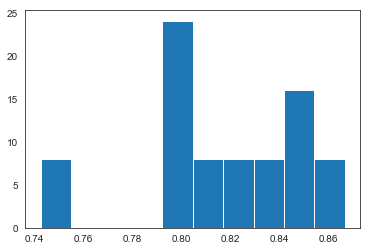

R-squared PLSR 3 features: 0.8253929924789901
3 PLSR Features cv_scores: [0.80595437 0.79438368 0.8315547  0.85294698 0.79308033 0.8433115
 0.82399773 0.80097994 0.74274924 0.8670942 ]
Average: 0.8156052682610131



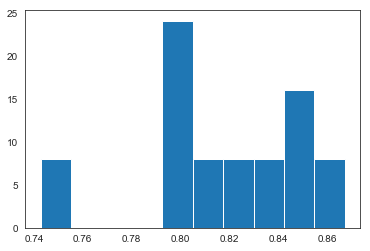

R-squared PLSR 4 features: 0.8253930201687626
4 PLSR Features cv_scores: [0.80595597 0.79438602 0.83153883 0.85293673 0.79311724 0.84333161
 0.82395019 0.8009636  0.74274134 0.86706468]
Average: 0.8155986190934323



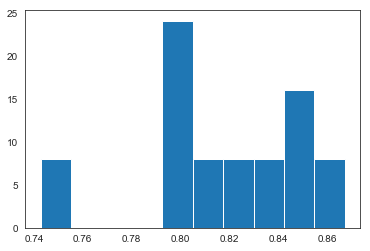

R-squared PLSR 5 features: 0.8253930202451348
5 PLSR Features cv_scores: [0.80595524 0.79438586 0.8315385  0.85293486 0.79311995 0.84333169
 0.82394919 0.80096379 0.74273992 0.86706345]
Average: 0.815598245064926



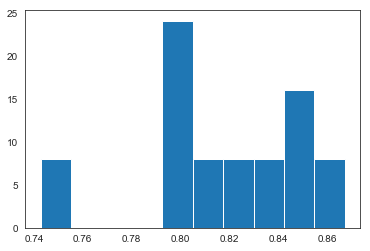

R-squared PLSR 6 features: 0.8253930202453335
6 PLSR Features cv_scores: [0.80595521 0.79438594 0.83153846 0.85293486 0.79312004 0.84333172
 0.82394917 0.80096384 0.74273991 0.86706344]
Average: 0.8155982616277606



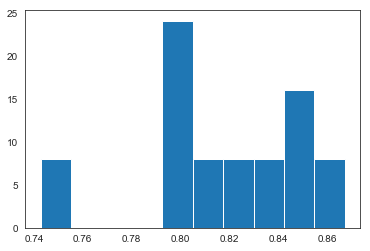

R-squared PLSR 7 features: 0.8253930202453338
7 PLSR Features cv_scores: [0.80595521 0.79438593 0.83153846 0.85293486 0.79312004 0.84333172
 0.82394917 0.80096384 0.74273991 0.86706344]
Average: 0.815598259630103



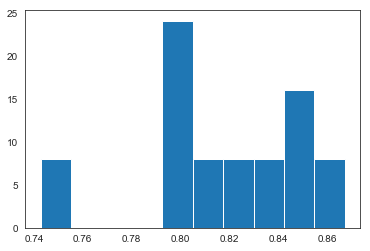

R-squared PLSR 8 features: 0.8253930202453338
8 PLSR Features cv_scores: [0.80595521 0.79438593 0.83153846 0.85293486 0.79312004 0.84333172
 0.82394917 0.80096384 0.74273991 0.86706344]
Average: 0.8155982596071739



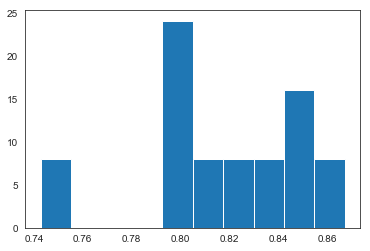

R-squared PLSR 9 features: 0.8253930202453338
9 PLSR Features cv_scores: [0.80595521 0.79438593 0.83153846 0.85293486 0.79312004 0.84333172
 0.82394917 0.80096384 0.74273991 0.86706344]
Average: 0.815598259607366



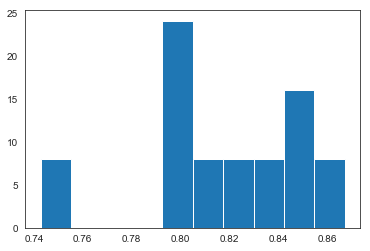

In [53]:
for n in np.arange(1,p):
    regr1 = PLSRegression(n_components=n)
    regr2 = PLSRegression(n_components=n)
    
    scores1 = cross_val_score(regr1, X, y, cv=10)
    regr2.fit(X,y)
    scores2 = regr2.score(X,y)
    
    print('R-squared PLSR {} features: {}'.format(n,scores2))
    print('{} PLSR Features cv_scores: {}'.format(n,scores1))
    print('Average: {}'.format(np.mean(scores1)))
    print()
    plt.hist(scores1, density=True, bins=10)
    plt.show()
